# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt

np.set_printoptions(precision=3)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
forward = 100
sigma = 0.2
texp = 4
vov = 0.5
rho = -0.5
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
#sabr_bsm.__dict__

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([0.243, 0.239, 0.234, 0.23 , 0.226, 0.223, 0.219, 0.215, 0.212,
        0.209, 0.206, 0.203, 0.2  , 0.198, 0.196, 0.193, 0.191, 0.19 ,
        0.188, 0.186, 0.185, 0.184, 0.183, 0.182, 0.181]))

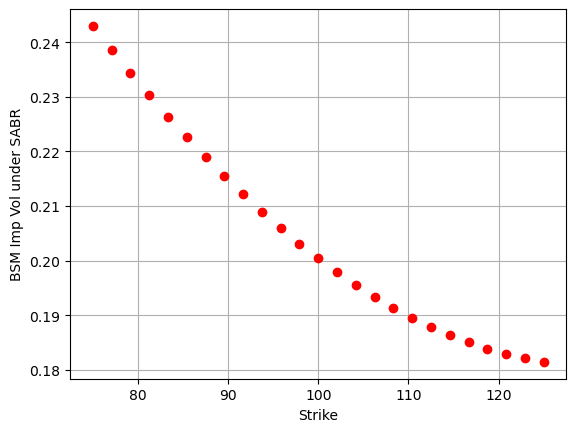

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 4
vov = 0.5
rho = -0.5

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

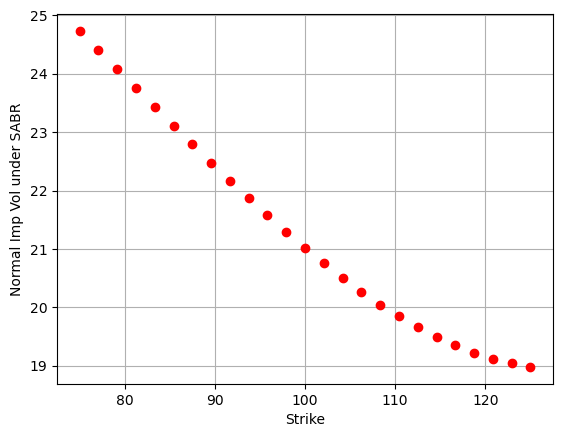

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [10]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([21.634, 15.885, 11.301]), array([0.215, 0.2  , 0.19 ]))

In [11]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': -0.5,
 'beta': 1}

In [12]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.19999999999442417,
 'vov': 0.5000000000095,
 'rho': -0.4999999998878149}

In [13]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

{'sigma': 0.1999999999944239,
 'vov': 0.5000000000094993,
 'rho': -0.49999999988781}

## 2. Pricing under MC method

In [14]:
strike = np.linspace(75,125,num=25)
forward = 100

### (1) SABR for $\beta=1$

In [15]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 1}


In [16]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([25.   , 22.917, 20.833, 18.75 , 16.667, 14.583, 12.5  , 10.417,
         8.333,  6.25 ,  4.167,  2.083,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ]))

### (2) SABR for $\beta=0$

In [17]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 0}


In [18]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([34.702, 33.039, 31.399, 29.784, 28.197, 26.64 , 25.114, 23.623,
        22.168, 20.753, 19.379, 18.051, 16.77 , 15.539, 14.361, 13.238,
        12.173, 11.167, 10.221,  9.336,  8.513,  7.75 ,  7.048,  6.403,
         5.813]),
 array([25.   , 22.917, 20.833, 18.75 , 16.667, 14.583, 12.5  , 10.417,
         8.333,  6.25 ,  4.167,  2.083,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ]))

## 3. Pricing under conditional MC method

In [19]:
strike = np.linspace(75,125,num=25)
forward = 100

### (1) SABR for $\beta=1$

In [20]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 1}


In [21]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([29.736, 28.307, 26.928, 25.601, 24.323, 23.096, 21.919, 20.791,
        19.711, 18.678, 17.692, 16.75 , 15.852, 14.996, 14.182, 13.407,
        12.671, 11.971, 11.307, 10.677, 10.08 ,  9.513,  8.977,  8.469,
         7.989]))

### (2) SABR for $\beta=0$

In [22]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelBsmCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 0}


In [23]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([34.702, 33.039, 31.399, 29.784, 28.197, 26.64 , 25.114, 23.623,
        22.168, 20.753, 19.379, 18.051, 16.77 , 15.539, 14.361, 13.238,
        12.173, 11.167, 10.221,  9.336,  8.513,  7.75 ,  7.048,  6.403,
         5.813]),
 array([31.477, 29.966, 28.491, 27.054, 25.657, 24.298, 22.981, 21.704,
        20.469, 19.277, 18.128, 17.021, 15.958, 14.938, 13.961, 13.027,
        12.136, 11.287, 10.481,  9.715,  8.99 ,  8.304,  7.658,  7.049,
         6.477]))

## 4. Compare the MC variance between regular vs conditional MC

### Repeat the pricing for 100 times and compare the mean and stdev of the results